In [1]:
from rgrow import Tile, TileSet
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

In [2]:
tiles = {f't_{i}_{j}':
    Tile(
        edges = [f'v_{i}_{j}', f'h_{i}_{j+1}', f'v_{i+1}_{j}', f'h_{i}_{j}'],
        name = f't_{i}_{j}',
        stoic = 1.0
    )
    for i in range(0, 10) 
    for j in range(0, 10)}

for (i, j) in []:
    tiles[f't_{i}_{j}'].stoic = 5

In [3]:
tileset = TileSet(
    list(tiles.values()),
    gse=5.5,
    gmc=10.0,
    model="kTAM",
    fission="keep-weighted",
)

In [4]:
sys = tileset.create_system()

In [5]:
res = tileset.run_ffs(keep_configs=True, target_size=50, max_configs=200)

In [13]:
res

FFSResult(6.7252e-11 M/s, [0.03183699458771092, 0.04113533525298231, 0.16474464579901152, 0.3215434083601286, 0.22271714922049, 0.352112676056338, 0.25316455696202533, 0.4166666666666667, 0.4366812227074236, 0.425531914893617, 0.5235602094240838, 0.5952380952380952, 0.5714285714285714, 0.7633587786259542, 0.6802721088435374, 0.6622516556291391, 0.5988023952095808, 0.6622516556291391, 0.6896551724137931, 0.819672131147541, 0.7751937984496124, 0.7407407407407407, 0.8264462809917356, 0.8, 0.8771929824561403, 0.8620689655172413, 0.9009009009009009, 0.9174311926605505, 0.9174311926605505, 0.9090909090909091, 0.9523809523809523, 0.9345794392523364, 0.9615384615384616, 0.9523809523809523, 0.9803921568627451, 0.9345794392523364, 0.9523809523809523, 0.970873786407767, 0.9803921568627451, 0.9615384615384616, 0.9803921568627451, 1.0, 1.0, 1.0, 0.9900990099009901, 0.9900990099009901])

Text(0, 0.5, 'forward probability')

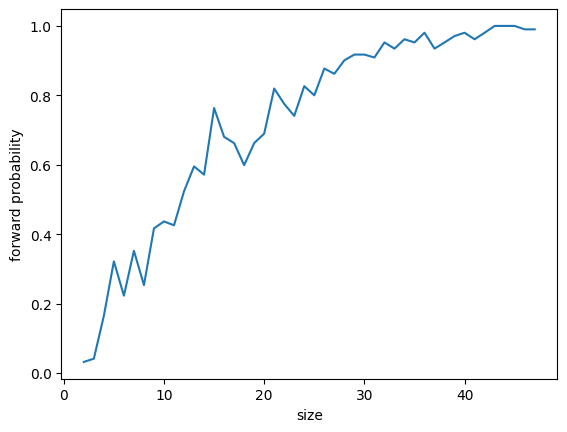

In [12]:
plt.plot(2+np.arange(len(res.forward_vec)), res.forward_vec)
plt.xlabel('size')
plt.ylabel('forward probability')

Text(0, 0.5, 'finish vs melt probability')

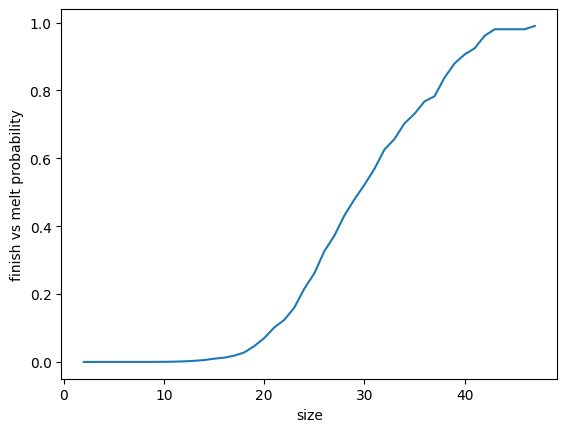

In [7]:
a = np.array(res.forward_vec)
full_prob = a[::-1].cumprod()[::-1]

plt.plot(2+np.arange(len(res.forward_vec)), full_prob)
plt.xlabel('size')
plt.ylabel('finish vs melt probability')

In [8]:
surfaces = res.surfaces_dataframe()

In [9]:
configs = res.configs_dataframe()

In [11]:
res

FFSResult(6.7252e-11 M/s, [0.03183699458771092, 0.04113533525298231, 0.16474464579901152, 0.3215434083601286, 0.22271714922049, 0.352112676056338, 0.25316455696202533, 0.4166666666666667, 0.4366812227074236, 0.425531914893617, 0.5235602094240838, 0.5952380952380952, 0.5714285714285714, 0.7633587786259542, 0.6802721088435374, 0.6622516556291391, 0.5988023952095808, 0.6622516556291391, 0.6896551724137931, 0.819672131147541, 0.7751937984496124, 0.7407407407407407, 0.8264462809917356, 0.8, 0.8771929824561403, 0.8620689655172413, 0.9009009009009009, 0.9174311926605505, 0.9174311926605505, 0.9090909090909091, 0.9523809523809523, 0.9345794392523364, 0.9615384615384616, 0.9523809523809523, 0.9803921568627451, 0.9345794392523364, 0.9523809523809523, 0.970873786407767, 0.9803921568627451, 0.9615384615384616, 0.9803921568627451, 1.0, 1.0, 1.0, 0.9900990099009901, 0.9900990099009901])

In [10]:
configs

surface_index,config_index,size,time,previous_config,canvas,min_i,min_j,max_i,max_j,shape_i,shape_j
u64,u64,u32,f64,u64,list[u32],u64,u64,u64,u64,f64,f64
0,0,2,0.0,42,"[42, 52]",32,32,33,32,2.0,1.0
0,1,2,0.0,20,"[20, 30]",32,32,33,32,2.0,1.0
0,2,2,0.0,52,"[52, 62]",32,32,33,32,2.0,1.0
0,3,2,0.0,28,"[27, 28]",32,32,32,33,1.0,2.0
0,4,2,0.0,34,"[33, 34]",32,32,32,33,1.0,2.0
…,…,…,…,…,…,…,…,…,…,…,…
46,95,48,0.433597,64,"[0, 0, … 0]",30,28,37,37,8.0,10.0
46,96,48,0.327362,20,"[1, 2, … 0]",29,28,35,35,7.0,8.0
46,97,48,0.677404,79,"[0, 0, … 0]",30,30,37,37,8.0,8.0


In [22]:
surfaces = res.surfaces
surfaces

In [25]:
dir(surfaces[10])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'configs',
 'get_state',
 'level',
 'previous_indices']

In [26]:
surfaces[10].configs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 

In [34]:
state = surfaces[10].get_state(10)
state

FFSStateRef(n_tiles=12, time=0.07322080093495215 s, events=509, size=(64, 64), total_rate=12867.693174277902)

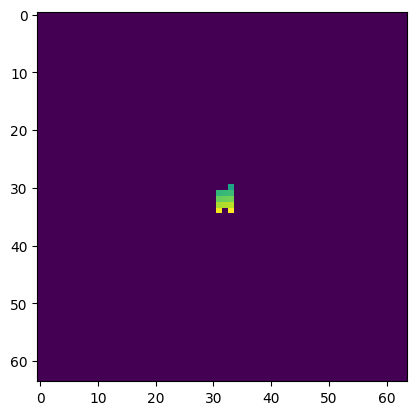

In [35]:
plt.imshow(state.canvas_view)